In [12]:
import numpy as np
import math
import scipy
import random
from scipy.integrate import quad
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.stats import norm, uniform, chi2

In [13]:
N=100

In [14]:
t=np.array([5, 8, 6, 12, 14, 18, 11, 6, 13, 7])
x=np.arange(10)
N=100
#оценки методом моментов 
teta1=np.sum(x*t)/N
teta2=(np.sum(np.square(teta1- x)*t)/N)**0.5
print('оценка мат. ожидания: ', teta1, '\nоценка дисперсии: ', teta2)

оценка мат. ожидания:  4.77 
оценка дисперсии:  2.505414137423193


In [15]:
def gauss_rule(x,mean,sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mean)**2 / (2 * sigma**2) )

In [16]:
p_2=[]
mean=teta1
sigma=teta2
bound=[i/10 for i in range(5, 86, 10)]# разбиение
bound.insert(0, -np.inf) #добавляем -np.inf 
bound.append(np.inf)

for i in range(0,10):
    p_2.append(integrate.quad(gauss_rule, bound[i], bound[i+1], args = (mean, sigma))[0])
    
tmp_1=0
for i in range(len(p_2)):
    if (N*p_2[i]>5):
         tmp_1+=1   
if tmp_1*100/N<20:
    print("процент npi>5: ", tmp_1*100/N, "%, не группируем")
p_2  

процент npi>5:  9.0 %, не группируем


[0.04416168212983389,
 0.05175521508344409,
 0.08654101633004253,
 0.12365379878125332,
 0.1509787007908184,
 0.15752502462940404,
 0.14044610482700384,
 0.10700262699130635,
 0.06966262530775079,
 0.06827320512910286]

In [17]:
delta_2=[]
for i in range(10):
    delta_2.append((t[i] - N*p_2[i])**2/(N*p_2[i]))
delta_p=np.sum(delta_2)
print(f"оценка расхождения с помощью критерия Пирсона", round(delta_p, 3))

оценка расхождения с помощью критерия Пирсона 10.799


In [18]:
delta_boot = np.zeros(50000)
for i in range(50000):
    y = np.random.normal(teta1, teta2, N).astype(int)
    counts=np.zeros(10)
    for m in range(N):
        for j in range(10):
            if y[m] == j:
                counts[j] += 1
    teta1_boot=np.sum(y)/N #оценки методом моментов
    teta2_boot=(np.sum(np.square(teta1_boot - y))/N)**0.5
    
    p_3=np.zeros(10)
    for j in range(0,10):
        p_3[j]=(integrate.quad(gauss_rule, bound[j], bound[j+1], args = (teta1_boot, teta2_boot))[0])
    delta_boot[i] = np.sum((counts - N*p_3)**2/(N*p_3))

In [19]:
#delta_boot[5000:5020]

In [20]:
boot = np.array([])
for i in np.arange(0,25,0.2):
    boot =  np.append(boot, sum(delta_boot < i)/50000)
#boot

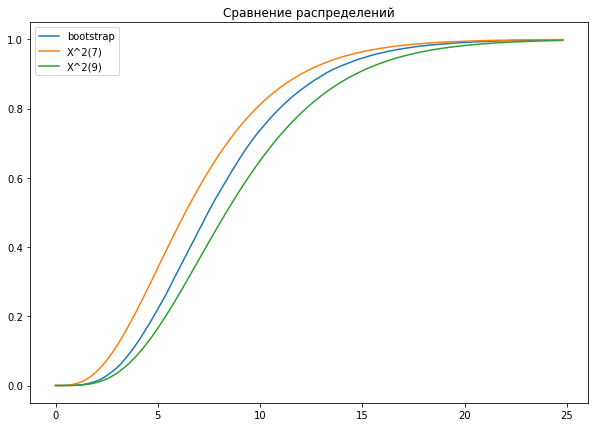

In [21]:
ax = np.arange(0,25,0.2)
plt.figure(figsize=(10,7))
plt.plot(ax, boot, label="bootstrap")
plt.plot(ax, chi2.cdf(ax, df = 7), label = 'X^2(7)')
plt.plot(ax, chi2.cdf(ax, df = 9), label = 'X^2(9)')
plt.title("Сравнение распределений")
plt.legend()
plt.show()